In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


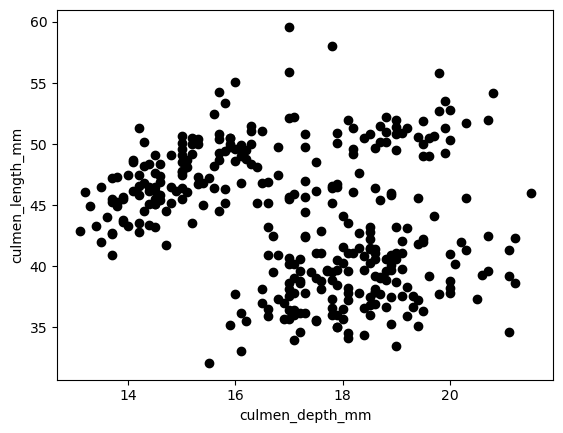

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('penguins.csv')
data.head()


X = data[["culmen_length_mm","culmen_depth_mm"]]
#Visualise data points
plt.scatter(X["culmen_depth_mm"],X["culmen_length_mm"],c='black')
plt.xlabel('culmen_depth_mm')
plt.ylabel('culmen_length_mm')
plt.show()

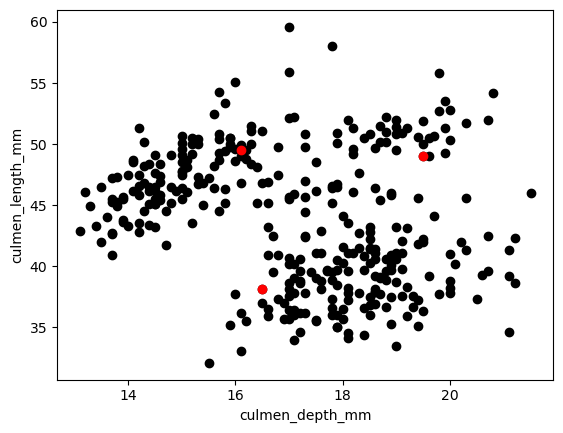

In [8]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["culmen_depth_mm"],X["culmen_length_mm"],c='black')
plt.scatter(Centroids["culmen_depth_mm"],Centroids["culmen_length_mm"],c='red')
plt.xlabel('culmen_depth_mm')
plt.ylabel('culmen_length_mm')
plt.show()

In [10]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["culmen_depth_mm"]-row_d["culmen_depth_mm"])**2
            d2=(row_c["culmen_length_mm"]-row_d["culmen_length_mm"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["culmen_length_mm","culmen_depth_mm"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['culmen_length_mm'] - Centroids['culmen_length_mm']).sum() + (Centroids_new['culmen_depth_mm'] - Centroids['culmen_depth_mm']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["culmen_length_mm","culmen_depth_mm"]]

-0.11967769039634213
-0.924631398483962
-0.4795149520617823
-0.2224169843678485
-0.17738399503516966
-0.18801037616072058
-0.19483198447201033
-0.07311504663964996
-0.07544040250936668
0.0


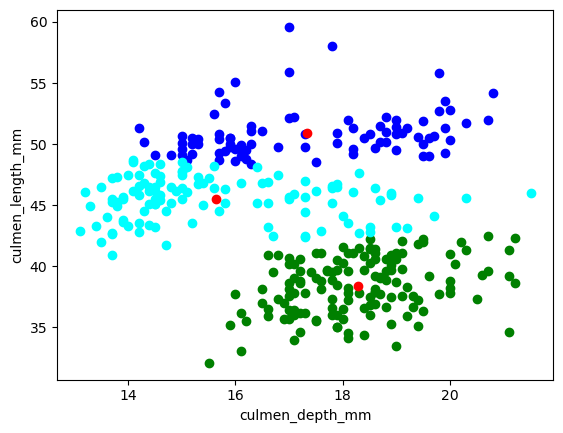

In [11]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["culmen_depth_mm"],data["culmen_length_mm"],c=color[k])
plt.scatter(Centroids["culmen_depth_mm"],Centroids["culmen_length_mm"],c='red')
plt.xlabel('culmen_depth_mm')
plt.ylabel('culmen_length_mm')
plt.show()

In [4]:
# reading the data and looking at the first five rows of the data

data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# statistics of the data
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000
